In [52]:
!pip install kaggle --silent



Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --silent


In [3]:
!set KAGGLE_API_TOKEN=KGAT_42e8ef7e3b8e8ecab47b7d92485d204e


In [4]:
!kaggle datasets list


ref                                                   title                                           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------  ----------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                              Heart Disease                                   3491  2025-12-11 15:29:14.327000           2114        141                1  
wardabilal/spotify-global-music-dataset-20092025      Spotify Global Music Dataset (2009–2025)     1289021  2025-11-11 09:43:05.933000          16387        469                1  
neurocipher/student-performance                       Student Performance                            49705  2025-12-12 12:06:28.973000           1261        102                1  
suvidyasonawane/student-performance-dataset           Student Performance Dataset                   

In [9]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria


Dataset URL: https://www.kaggle.com/datasets/iarunava/cell-images-for-detecting-malaria
License(s): unknown




  0%|          | 0.00/675M [00:00<?, ?B/s]
  0%|          | 1.00M/675M [00:02<26:02, 453kB/s]
  0%|          | 2.00M/675M [00:03<19:43, 596kB/s]
  0%|          | 3.00M/675M [00:07<28:15, 416kB/s]
  1%|          | 4.00M/675M [00:10<32:14, 364kB/s]
  1%|          | 5.00M/675M [00:11<25:11, 465kB/s]
  1%|          | 6.00M/675M [00:12<20:32, 569kB/s]
  1%|1         | 7.00M/675M [00:13<18:02, 647kB/s]
  1%|1         | 8.00M/675M [00:14<15:56, 732kB/s]
  1%|1         | 9.00M/675M [00:15<13:52, 839kB/s]
  1%|1         | 10.0M/675M [00:16<12:55, 899kB/s]
  2%|1         | 11.0M/675M [00:17<12:04, 961kB/s]
  2%|1         | 12.0M/675M [00:18<12:12, 950kB/s]
  2%|1         | 13.0M/675M [00:19<12:10, 951kB/s]
  2%|2         | 14.0M/675M [00:20<11:44, 985kB/s]
  2%|2         | 15.0M/675M [00:21<11:02, 1.05MB/s]
  2%|2         | 16.0M/675M [00:22<10:35, 1.09MB/s]
  3%|2         | 17.0M/675M [00:23<10:41, 1.08MB/s]
  3%|2         | 18.0M/675M [00:24<10:00, 1.15MB/s]
  3%|2         | 19.0M/675M [00:25

In [10]:
import zipfile

zip_path = "cell-images-for-detecting-malaria.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()


In [11]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'cell-images-for-detecting-malaria.zip', 'cell_images', 'Untitled.ipynb']


In [12]:
print(os.listdir("./cell_images"))
print(os.listdir("./cell_images/cell_images"))


['cell_images', 'Parasitized', 'Uninfected']
['Parasitized', 'Uninfected']


In [13]:
infected = os.listdir('./cell_images/cell_images/Parasitized/')
uninfected = os.listdir('./cell_images/cell_images/Uninfected/')


In [17]:
!pip install opencv-python --silent


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --silent


(np.float64(-0.5), np.float64(141.5), np.float64(147.5), np.float64(-0.5))

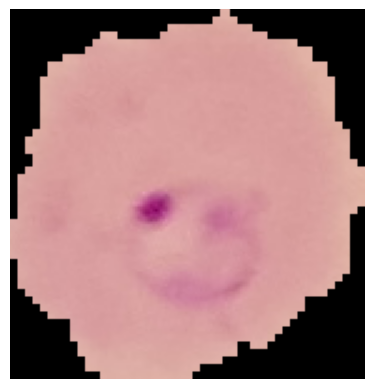

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./cell_images/cell_images/Parasitized/' + infected[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')


In [23]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical


In [21]:
!pip install tensorflow

In [24]:
data = []
labels = []

data_rotate = []
labels_rotate = []

data_blur = []
labels_blur = []


In [25]:
for i in infected:
    try:
        image = cv2.imread("./cell_images/cell_images/Parasitized/" + i)
        if image is None:
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_array = Image.fromarray(image)
        resize_img = image_array.resize((50, 50))

        rotated120 = resize_img.rotate(120)
        blur = cv2.blur(np.array(resize_img), (10, 10))

        data.append(np.array(resize_img))
        data_rotate.append(np.array(rotated120))
        data_blur.append(np.array(blur))

        label = to_categorical(1, num_classes=2)
        labels.append(label)
        labels_rotate.append(label)
        labels_blur.append(label)

    except Exception as e:
        print(e)


In [26]:
for u in uninfected:
    try:
        image = cv2.imread("./cell_images/cell_images/Uninfected/" + u)
        if image is None:
            continue

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_array = Image.fromarray(image)
        resize_img = image_array.resize((50, 50))

        rotated120 = resize_img.rotate(120)
        blur = cv2.blur(np.array(resize_img), (10, 10))

        data.append(np.array(resize_img))
        data_rotate.append(np.array(rotated120))
        data_blur.append(np.array(blur))

        label = to_categorical(0, num_classes=2)
        labels.append(label)
        labels_rotate.append(label)
        labels_blur.append(label)

    except Exception as e:
        print(e)


In [27]:
data = np.array(data)
data_rotate = np.array(data_rotate)
data_blur = np.array(data_blur)

labels = np.array(labels)
labels_rotate = np.array(labels_rotate)
labels_blur = np.array(labels_blur)


In [28]:
np.save('Data.npy', data)
np.save('Labels.npy', labels)

np.save('Data_Rotate.npy', data_rotate)
np.save('Labels_Rotate.npy', labels_rotate)

np.save('Data_Blur.npy', data_blur)
np.save('Labels_Blur.npy', labels_blur)


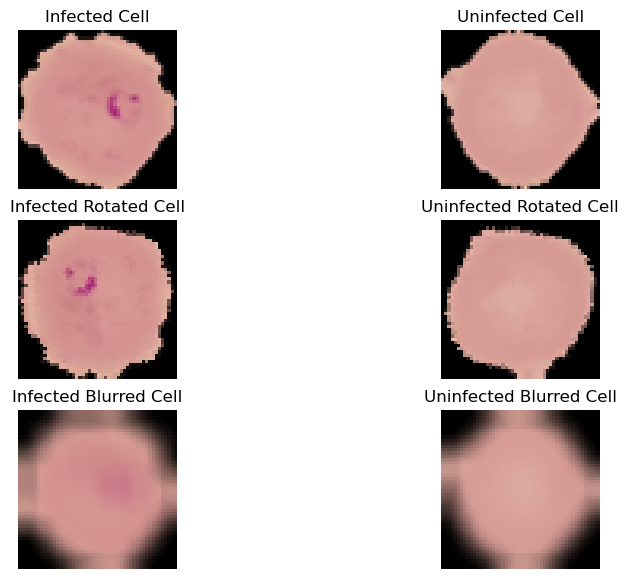

In [29]:
plt.figure(figsize=(10, 7))

plt.subplot(3, 2, 1)
plt.imshow(data[10])
plt.title('Infected Cell')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.imshow(data[len(data)//2])
plt.title('Uninfected Cell')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.imshow(data_rotate[10])
plt.title('Infected Rotated Cell')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.imshow(data_rotate[len(data_rotate)//2])
plt.title('Uninfected Rotated Cell')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.imshow(data_blur[10])
plt.title('Infected Blurred Cell')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.imshow(data_blur[len(data_blur)//2])
plt.title('Uninfected Blurred Cell')
plt.axis('off')

plt.show()


In [30]:
def shuffle_data(X, Y):
    idx = np.arange(len(X))
    np.random.shuffle(idx)
    return X[idx], Y[idx]

data, labels = shuffle_data(data, labels)
data_rotate, labels_rotate = shuffle_data(data_rotate, labels_rotate)
data_blur, labels_blur = shuffle_data(data_blur, labels_blur)

data = data.astype(np.float32) / 255.0
data_rotate = data_rotate.astype(np.float32) / 255.0
data_blur = data_blur.astype(np.float32) / 255.0


In [31]:
X = np.concatenate((data, data_rotate, data_blur), axis=0)
Y = np.concatenate((labels, labels_rotate, labels_blur), axis=0)

X, Y = shuffle_data(X, Y)

print(f"Cells : {X.shape} | Labels : {Y.shape}")


Cells : (82674, 50, 50, 3) | Labels : (82674, 2)


In [33]:
from sklearn.model_selection import train_test_split


In [34]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y,
    test_size=0.30,
    random_state=0,
    stratify=Y   # keeps infected/uninfected ratio balanced
)


In [35]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')


SHAPE OF TRAINING IMAGE DATA : (57871, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (24803, 50, 50, 3)
SHAPE OF TRAINING LABELS : (57871, 2)
SHAPE OF TESTING LABELS : (24803, 2)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, BatchNormalization,
    Dropout, Flatten, Dense, Input
)
from tensorflow.keras import backend as K


In [42]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
        chanDim = 1

    model.add(Input(shape=inputShape))

    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis=chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))

    return model


In [43]:
model = CNNbuild(50, 50, 2, 3)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 11, 11, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 9, 9, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,146,306 (4.37 MB)

 Trainable params: 1,144,834 (4.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [44]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [45]:
fitting = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=256,
    validation_split=0.1,
    verbose=1
)


Epoch 1/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 199s 912ms/step - accuracy: 0.7758 - loss: 0.5634 - val_accuracy: 0.5002 - val_loss: 2.8642
Epoch 2/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 172s 843ms/step - accuracy: 0.8891 - loss: 0.2731 - val_accuracy: 0.6570 - val_loss: 1.1805
Epoch 3/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 156s 764ms/step - accuracy: 0.9161 - loss: 0.2208 - val_accuracy: 0.8176 - val_loss: 0.6068
Epoch 4/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 158s 774ms/step - accuracy: 0.9261 - loss: 0.1970 - val_accuracy: 0.9114 - val_loss: 0.2563
Epoch 5/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 154s 754ms/step - accuracy: 0.9319 - loss: 0.1839 - val_accuracy: 0.9024 - val_loss: 0.2835
Epoch 6/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 158s 776ms/step - accuracy: 0.9361 - loss: 0.1749 - val_accuracy: 0.9109 - val_loss: 0.2933
Epoch 7/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 155s 762ms/step - accuracy: 0.9395 - loss: 0.1642 - val_accuracy: 0.9255 - val_loss: 0.2154
Epoch 8/20
204/204 ━━━━━━━━━━━━━━━━━━━━ 178s 875ms/step - accuracy: 0.9412 -

In [46]:
predictions = model.evaluate(x_test, y_test, verbose=0)

print(f"Loss : {predictions[0]}")
print(f"Accuracy : {predictions[1]}")


Loss : 0.15993206202983856
Accuracy : 0.9478288888931274


In [47]:
pred_label = model.predict(x_test, verbose=0)
pred_label = np.argmax(pred_label, axis=-1)

true_label = np.argmax(y_test, axis=-1)


In [48]:
print(pred_label[:20])
print(true_label[:20])


[1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1]
[1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1]


In [49]:
from sklearn.metrics import classification_report

print(classification_report(true_label, pred_label))


              precision    recall  f1-score   support

           0       0.93      0.97      0.95     12401
           1       0.97      0.92      0.95     12402

    accuracy                           0.95     24803
   macro avg       0.95      0.95      0.95     24803
weighted avg       0.95      0.95      0.95     24803



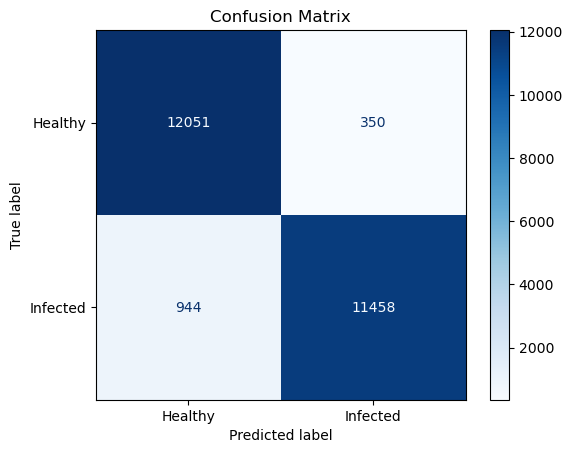

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_label, pred_label)

disp = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=['Healthy', 'Infected']
)

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
